In [1]:
import os
os.chdir('..')

In [2]:
## it’s mine, my own, 
from modules.get_data import get_x_y
from jh_utils.data.pandas.preprocessing import make_dummies
from modules.evaluation import fit_classify, print_2_reports, plot_false_negative_rate

In [3]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
## posfit
from sklearn.metrics import roc_auc_score, precision_recall_curve, det_curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
## models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

---

---

## Random Forest Classifier n=50

In [5]:
x,y = get_x_y()
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

#scaler = MinMaxScaler()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/home/joaoholz/Documents/ufes/trabalho_final/modules/get_data.py:6: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("asteroides/asteoides.csv").iloc[:, first_columns:]


In [6]:
rf = RandomForestClassifier(n_estimators=50) # 80,120,160,200

In [7]:
rf_fit = rf.fit(x_train,y_train)
# the wizard "arrives precisely when he means to."

/tmp/ipykernel_60376/3319219848.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_fit = rf.fit(x_train,y_train)


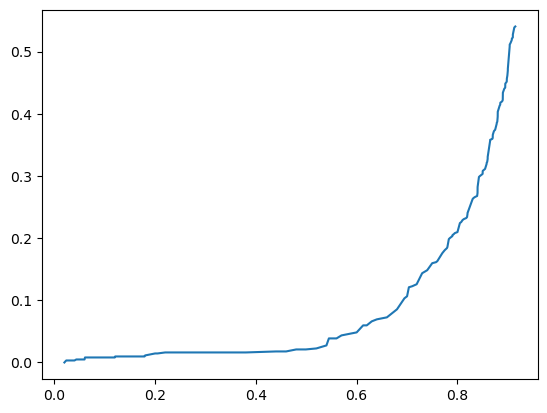

In [8]:
y_prob = rf.predict_proba(x_test)[:,1]
plot_false_negative_rate(y_test,y_prob)

In [9]:
y_pred = list(map(lambda x: x> 0.5, y_prob))
print_2_reports(y_test,y_pred)

y_pred = list(map(lambda x: x> 0.35, y_prob))
print_2_reports(y_test,y_pred)

y_pred = list(map(lambda x: x> 0.05, y_prob))
print_2_reports(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.99      0.98      0.98       620

    accuracy                           1.00    279701
   macro avg       0.99      0.99      0.99    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  279073    8
Y      14  606
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.98      0.98      0.98       620

    accuracy                           1.00    279701
   macro avg       0.99      0.99      0.99    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  279070   11
Y      10  610
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.53      1.00      0.69       620

    accuracy                           1.00    279701
   macro avg       0.77      1.00     

---

## Random Forest MinMax

In [10]:
x,y = get_x_y()
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

scaler = MinMaxScaler()
#scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/home/joaoholz/Documents/ufes/trabalho_final/modules/get_data.py:6: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("asteroides/asteoides.csv").iloc[:, first_columns:]


In [11]:
rf = RandomForestClassifier(n_estimators=50) # 80,120,160,200

In [12]:
rf_fit = rf.fit(x_train,y_train)
# the wizard "arrives precisely when he means to."

/tmp/ipykernel_60376/3319219848.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_fit = rf.fit(x_train,y_train)


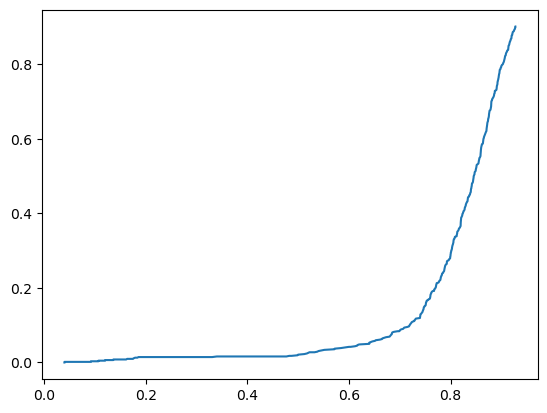

In [13]:
y_prob = rf.predict_proba(x_test)[:,1]
plot_false_negative_rate(y_test,y_prob)

In [14]:
y_pred = list(map(lambda x: x> 0.5, y_prob))
print_2_reports(y_test,y_pred)

y_pred = list(map(lambda x: x> 0.35, y_prob))
print_2_reports(y_test,y_pred)

y_pred = list(map(lambda x: x> 0.05, y_prob))
print_2_reports(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.99      0.98      0.98       620

    accuracy                           1.00    279701
   macro avg       0.99      0.99      0.99    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  279072    9
Y      14  606
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.98      0.98      0.98       620

    accuracy                           1.00    279701
   macro avg       0.99      0.99      0.99    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  279070   11
Y      10  610
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.48      1.00      0.65       620

    accuracy                           1.00    279701
   macro avg       0.74      1.00     

----
## Adaboost

In [15]:
x,y = get_x_y()
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

scaler = MinMaxScaler()
#scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/home/joaoholz/Documents/ufes/trabalho_final/modules/get_data.py:6: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("asteroides/asteoides.csv").iloc[:, first_columns:]


In [16]:
ada = AdaBoostClassifier()
ada_fit = ada.fit(x_train,y_train)
y_prob = ada.predict_proba(x_test)[:,1]

/home/joaoholz/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


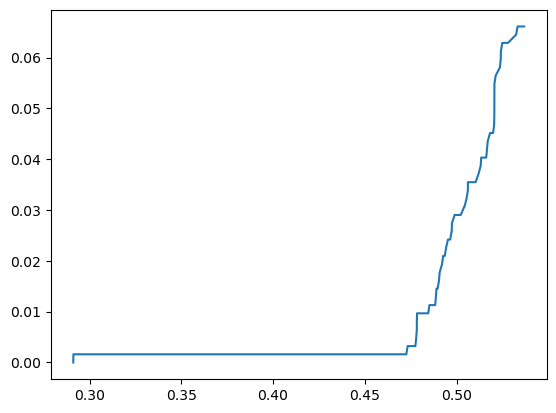

In [17]:
plot_false_negative_rate(y_test,y_prob)

In [18]:
#y_pred = model.predict(x_test)
y_pred = list(map(lambda x: x>0.5, y_prob))
print_2_reports(y_test,y_pred)

y_pred = list(map(lambda x: x>0.47, y_prob))
print_2_reports(y_test,y_pred)

y_pred = list(map(lambda x: x>0.40, y_prob))
print_2_reports(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.98      0.97      0.98       620

    accuracy                           1.00    279701
   macro avg       0.99      0.99      0.99    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  279071   10
Y      18  602
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.93      1.00      0.96       620

    accuracy                           1.00    279701
   macro avg       0.96      1.00      0.98    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  279031   50
Y       1  619
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.81      1.00      0.89       620

    accuracy                           1.00    279701
   macro avg       0.90      1.00     

----
## Adaboost Standard

In [19]:
x,y = get_x_y()
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

#scaler = MinMaxScaler()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/home/joaoholz/Documents/ufes/trabalho_final/modules/get_data.py:6: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("asteroides/asteoides.csv").iloc[:, first_columns:]


In [20]:
ada = AdaBoostClassifier()
ada_fit = ada.fit(x_train,y_train)
y_prob = ada.predict_proba(x_test)[:,1]

/home/joaoholz/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


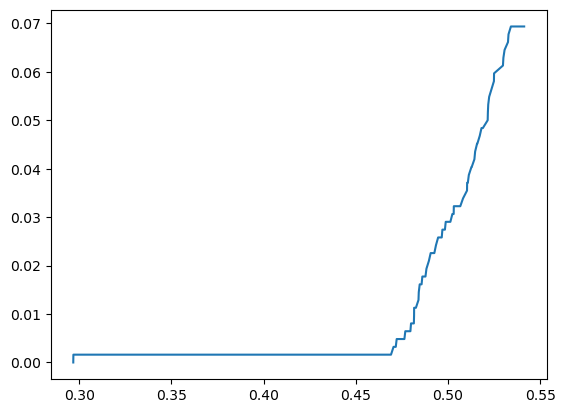

In [21]:
plot_false_negative_rate(y_test,y_prob)

In [22]:
#y_pred = model.predict(x_test)
y_pred = list(map(lambda x: x>0.5, y_prob))
print_2_reports(y_test,y_pred)

y_pred = list(map(lambda x: x>0.47, y_prob))
print_2_reports(y_test,y_pred)

y_pred = list(map(lambda x: x>0.40, y_prob))
print_2_reports(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.99      0.97      0.98       620

    accuracy                           1.00    279701
   macro avg       0.99      0.99      0.99    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  279072    9
Y      18  602
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.93      1.00      0.96       620

    accuracy                           1.00    279701
   macro avg       0.97      1.00      0.98    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  279038   43
Y       2  618
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.40      1.00      0.57       620

    accuracy                           1.00    279701
   macro avg       0.70      1.00     